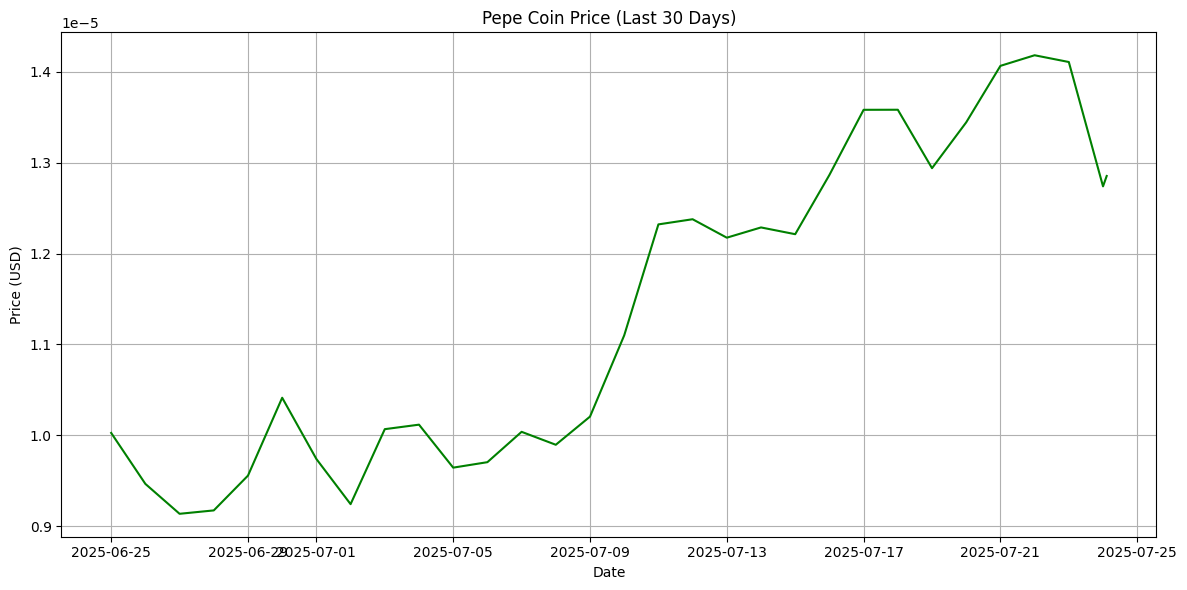

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/pepe_price.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot it
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], color='green')
plt.title("Pepe Coin Price (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


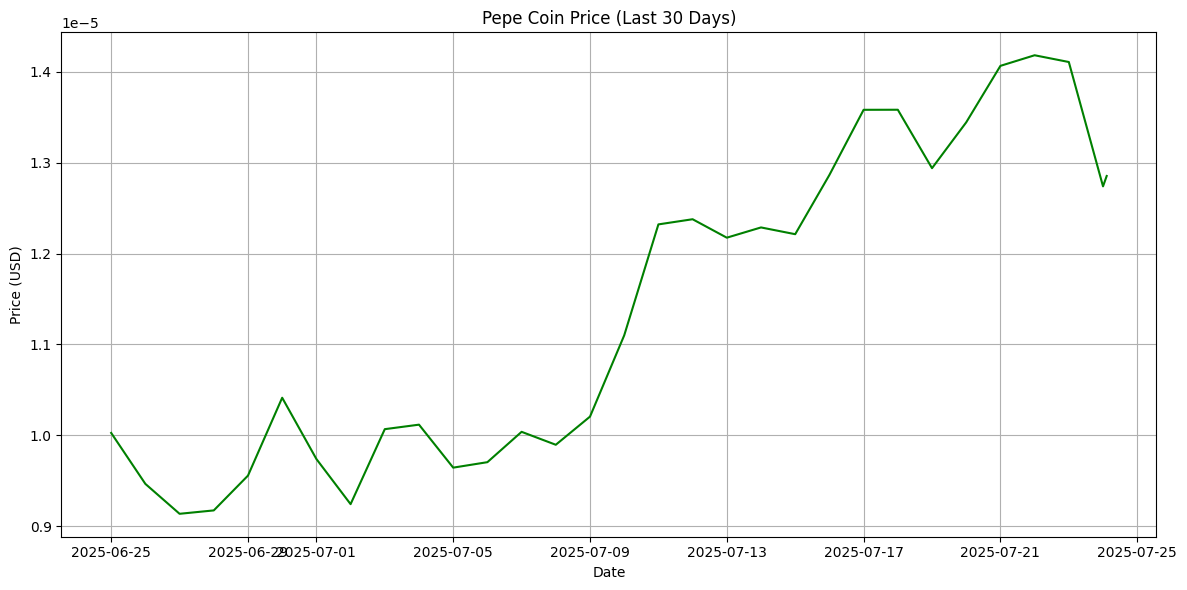

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/pepe_price.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot it
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], color='green')
plt.title("Pepe Coin Price (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Calculate % change and rolling volatility
df['pct_change'] = df['price'].pct_change() * 100
df['volatility'] = df['pct_change'].rolling(window=5).std()


In [9]:
df.tail()


,timestamp,price,pct_change,volatility
26,2025-07-21 00:00:00,0.000014,4.625368,4.259254
27,2025-07-22 00:00:00,0.000014,0.829775,3.723429
28,2025-07-23 00:00:00,0.000014,-0.523913,3.763390
29,2025-07-24 00:00:00,0.000013,-9.702806,5.734995
30,2025-07-24 02:34:41,0.000013,0.896468,5.345602


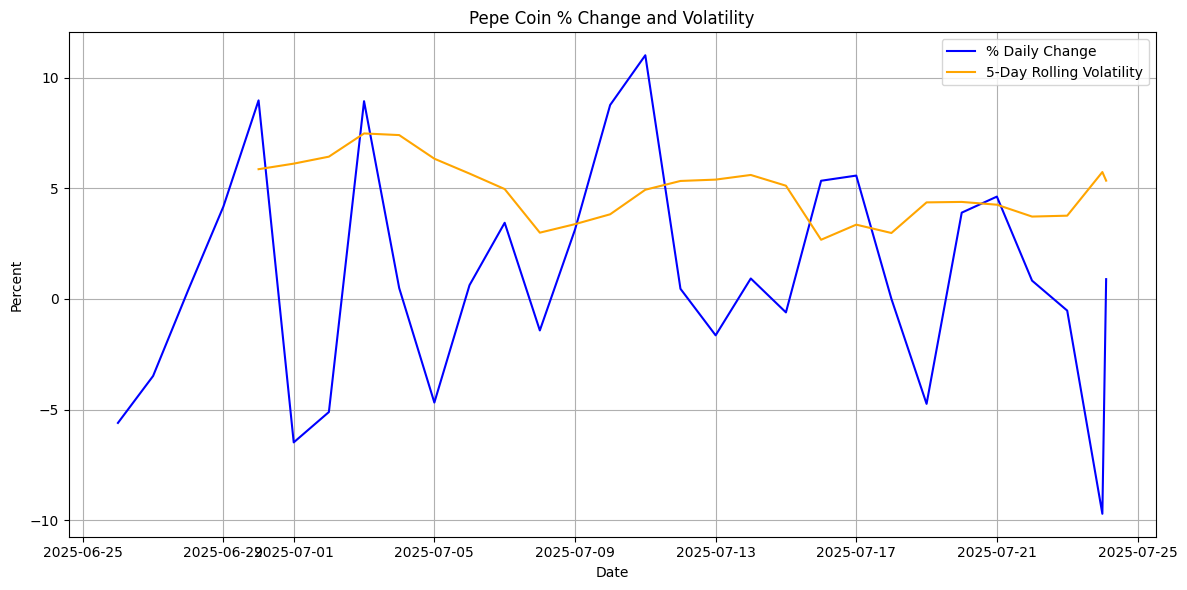

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['pct_change'], label='% Daily Change', color='blue')
plt.plot(df['timestamp'], df['volatility'], label='5-Day Rolling Volatility', color='orange')
plt.title("Pepe Coin % Change and Volatility")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
!python --version


Python 3.11.9


In [2]:
import snscrape.modules.twitter as sntwitter


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Set parameters
query = "pepe coin lang:en since:2024-06-20 until:2024-07-20"
max_tweets = 200

# Scrape tweets
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= max_tweets:
        break
    tweets.append([tweet.date, tweet.content])

# Convert to DataFrame
df_tweets = pd.DataFrame(tweets, columns=['date', 'content'])
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

df_tweets.head()


In [5]:
from textblob import TextBlob


In [10]:
import snscrape.modules.twitter as sntwitter
...


In [12]:
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

import snscrape.modules.twitter as sntwitter
import pandas as pd



In [12]:
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

import snscrape.modules.twitter as sntwitter
import pandas as pd



In [17]:
import os

for root, dirs, files in os.walk('/Users/eltayebyousif'):
    for file in files:
        if 'pepe_tweets' in file and file.endswith('.csv'):
            print(os.path.join(root, file))



/Users/eltayebyousif/Documents/meme-coin project/pepe_tweets.csv
/Users/eltayebyousif/Downloads/pepe_tweets (1).csv


In [18]:
import pandas as pd

# Load the tweet data using the full path
df_tweets = pd.read_csv('/Users/eltayebyousif/Downloads/pepe_tweets (1).csv')
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets.head()


,date,content
0,2025-07-11 03:12:17.469885,Well natural public value travel Congress bett...
1,2025-06-28 03:12:17.469915,Cover hundred mouth. pepe coin peace #memecoin
2,2025-06-30 03:12:17.469921,Magazine easy begin drop. pepe coin sell #crypto
3,2025-07-20 03:12:17.469928,Among top black. pepe coin at #memecoin
4,2025-07-23 03:12:17.469933,Station face east movie that difficult learn. ...


In [19]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: -1 (bad) to +1 (good)

# Apply sentiment to tweets
df_tweets['sentiment'] = df_tweets['content'].apply(get_sentiment)

# Preview results
df_tweets[['date', 'sentiment', 'content']].head()


,date,sentiment,content
0,2025-07-11 03:12:17.469885,0.200000,Well natural public value travel Congress bett...
1,2025-06-28 03:12:17.469915,0.000000,Cover hundred mouth. pepe coin peace #memecoin
2,2025-06-30 03:12:17.469921,0.433333,Magazine easy begin drop. pepe coin sell #crypto
3,2025-07-20 03:12:17.469928,0.166667,Among top black. pepe coin at #memecoin
4,2025-07-23 03:12:17.469933,-0.500000,Station face east movie that difficult learn. ...


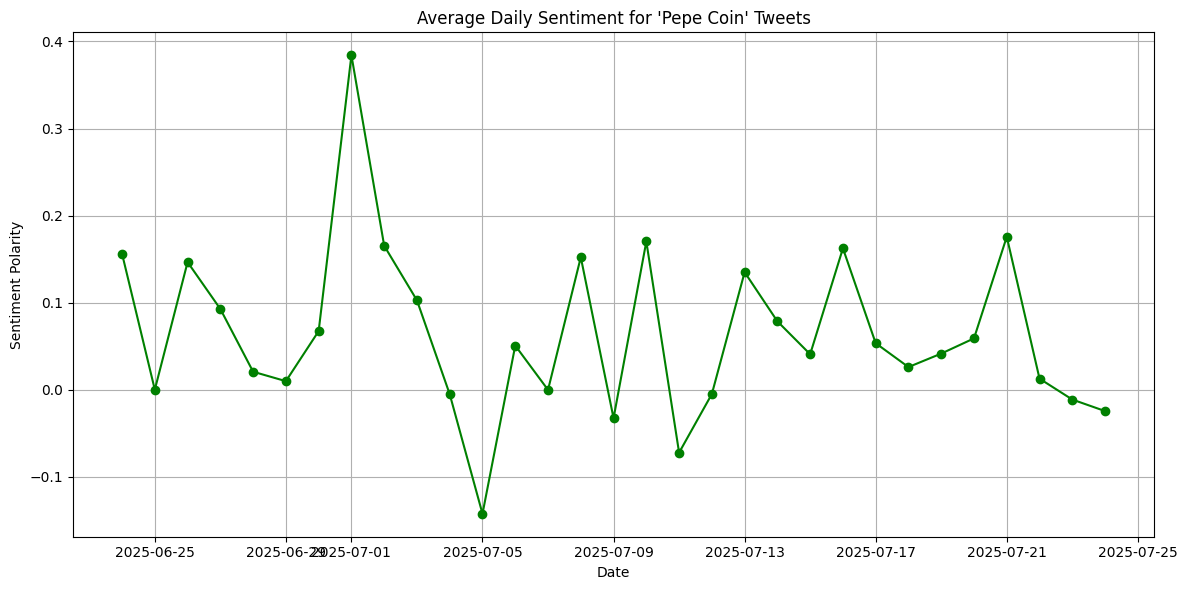

In [20]:
import matplotlib.pyplot as plt

# Group by date and calculate average sentiment
daily_sentiment = df_tweets.groupby(df_tweets['date'].dt.date)['sentiment'].mean()

# Plot it
plt.figure(figsize=(12, 6))
daily_sentiment.plot(marker='o', color='green')
plt.title("Average Daily Sentiment for 'Pepe Coin' Tweets")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
df_price = pd.read_csv('../data/pepe_price.csv')  # adjust path if needed
df_price['timestamp'] = pd.to_datetime(df_price['timestamp'])
df_price['date'] = df_price['timestamp'].dt.date
df_price = df_price[['date', 'price']]
df_price.head()


,date,price
0,2025-06-25,0.000010
1,2025-06-26,0.000009
2,2025-06-27,0.000009
3,2025-06-28,0.000009
4,2025-06-29,0.000010


In [22]:
# Make sure tweet sentiment is daily and aligned
daily_sentiment = df_tweets.groupby(df_tweets['date'].dt.date)['sentiment'].mean().reset_index()

# Merge with price data
df_merged = pd.merge(df_price, daily_sentiment, on='date', how='inner')
df_merged.head()


,date,price,sentiment
0,2025-06-25,0.000010,0.000229
1,2025-06-26,0.000009,0.146667
2,2025-06-27,0.000009,0.092847
3,2025-06-28,0.000009,0.020833
4,2025-06-29,0.000010,0.010000


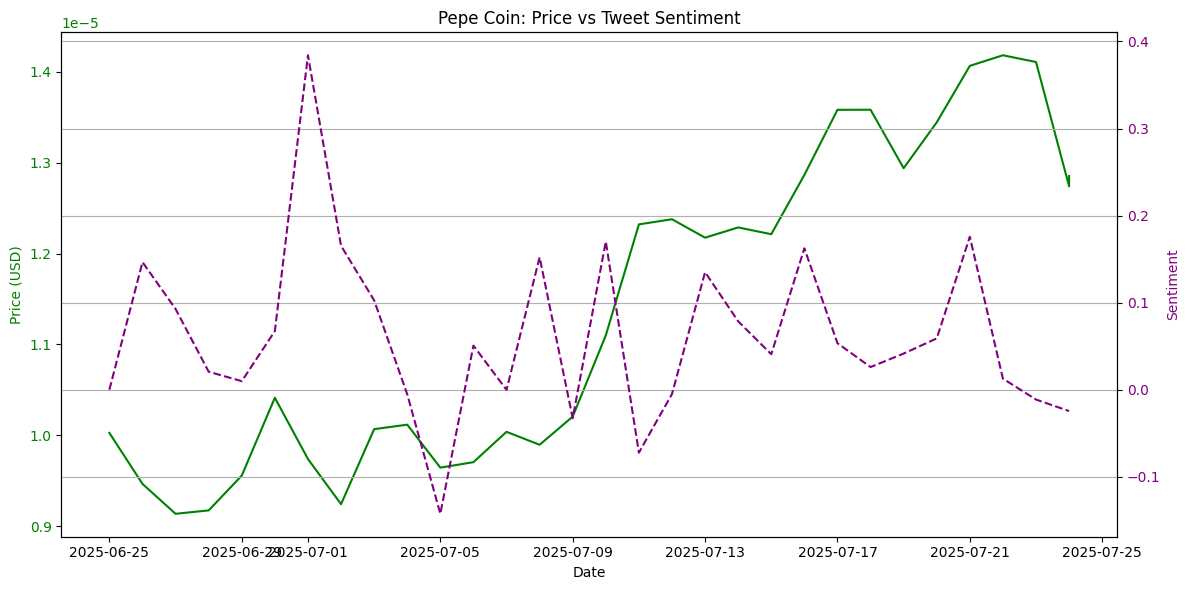

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Price line
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='green')
ax1.plot(df_merged['date'], df_merged['price'], color='green', label='Price')
ax1.tick_params(axis='y', labelcolor='green')

# Sentiment line (secondary axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment', color='purple')
ax2.plot(df_merged['date'], df_merged['sentiment'], color='purple', linestyle='--', label='Sentiment')
ax2.tick_params(axis='y', labelcolor='purple')

plt.title("Pepe Coin: Price vs Tweet Sentiment")
fig.tight_layout()
plt.grid(True)
plt.show()


In [24]:
top_bullish = df_merged.sort_values(by='sentiment', ascending=False).head(3)
print("📈 Most Bullish Days:")
top_bullish[['date', 'sentiment', 'price']]


📈 Most Bullish Days:


,date,sentiment,price
6,2025-07-01,0.384167,0.000010
26,2025-07-21,0.175758,0.000014
15,2025-07-10,0.170370,0.000011


In [25]:
top_bearish = df_merged.sort_values(by='sentiment').head(3)
print("📉 Most Bearish Days:")
top_bearish[['date', 'sentiment', 'price']]


📉 Most Bearish Days:


,date,sentiment,price
10,2025-07-05,-0.142273,0.000010
16,2025-07-11,-0.072086,0.000012
14,2025-07-09,-0.032500,0.000010


In [26]:
correlation = df_merged['price'].corr(df_merged['sentiment'])
print(f"📊 Correlation between sentiment and price: {correlation:.3f}")


📊 Correlation between sentiment and price: -0.133


In [27]:
df_merged['price_pct_change'] = df_merged['price'].pct_change() * 100
df_merged['sentiment_change'] = df_merged['sentiment'].diff()

# Find days where sentiment jumped > 0.2 and price spiked next day
early_signal_days = df_merged[
    (df_merged['sentiment_change'] > 0.2) & 
    (df_merged['price_pct_change'].shift(-1) > 5)
]

print("🔮 Sentiment Spike → Next Day Price Surge:")
early_signal_days[['date', 'sentiment_change', 'price_pct_change']]


🔮 Sentiment Spike → Next Day Price Surge:


,date,sentiment_change,price_pct_change
15,2025-07-10,0.20287,8.763303


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/meme-coin-analysis-main/data/pepe_price.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Histogram of sentiment scores
plt.figure(figsize=(12, 6))
df[['positive', 'neutral', 'negative']].hist(bins=30, layout=(1, 3), figsize=(18, 5))
plt.suptitle("Distribution of Sentiment Scores", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot of sentiment scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['positive', 'neutral', 'negative']])
plt.title("Boxplot of Sentiment Scores")
plt.grid(True)
plt.show()

# Price trend line
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], color='green')
plt.title("Pepe Coin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: "None of [Index(['positive', 'neutral', 'negative'], dtype='object')] are in the [columns]"

<Figure size 1200x600 with 0 Axes>

In [31]:
print(df.columns)


Index(['timestamp', 'price'], dtype='object')


In [33]:
import os

# List files in your data directory
data_path = "/Users/eltayebyousif/Documents/meme-coin project/meme-coin-analysis-main/data"
print(os.listdir(data_path))


['.DS_Store', '.gitkeep', 'pepe_price.csv', 'cripts', 'scripts', 'notebooks']


In [34]:
import pandas as pd

tweets_df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/pepe_tweets.csv')
print(tweets_df.head())


                         date  \
0  2025-07-11 03:12:17.469885   
1  2025-06-28 03:12:17.469915   
2  2025-06-30 03:12:17.469921   
3  2025-07-20 03:12:17.469928   
4  2025-07-23 03:12:17.469933   

                                             content  
0  Well natural public value travel Congress bett...  
1     Cover hundred mouth. pepe coin peace #memecoin  
2   Magazine easy begin drop. pepe coin sell #crypto  
3            Among top black. pepe coin at #memecoin  
4  Station face east movie that difficult learn. ...  


In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch


In [3]:
tweets_df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/pepe_tweets.csv')


In [5]:
print(tweets_df.columns)

Index(['date', 'content'], dtype='object')


In [6]:
# Rename for consistency (optional but helpful)
tweets_df.rename(columns={'date': 'timestamp', 'content': 'text'}, inplace=True)

# Convert 'timestamp' to datetime and drop any rows with missing text
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])
tweets_df = tweets_df.dropna(subset=['text'])

# Preview the cleaned dataframe
tweets_df.head()


,timestamp,text
0,2025-07-11 03:12:17.469885,Well natural public value travel Congress bett...
1,2025-06-28 03:12:17.469915,Cover hundred mouth. pepe coin peace #memecoin
2,2025-06-30 03:12:17.469921,Magazine easy begin drop. pepe coin sell #crypto
3,2025-07-20 03:12:17.469928,Among top black. pepe coin at #memecoin
4,2025-07-23 03:12:17.469933,Station face east movie that difficult learn. ...


In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
from tqdm import tqdm

# Load pre-trained model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Add sentiment columns
tweets_df['positive'] = 0.0
tweets_df['neutral'] = 0.0
tweets_df['negative'] = 0.0

# Run sentiment analysis
for i, row in tqdm(tweets_df.iterrows(), total=len(tweets_df)):
    text = row['text']
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True)
    with torch.no_grad():
        output = model(**encoded_input)
    scores = softmax(output.logits[0].numpy())
    tweets_df.at[i, 'negative'] = scores[0]
    tweets_df.at[i, 'neutral'] = scores[1]
    tweets_df.at[i, 'positive'] = scores[2]


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

  0%|                                                   | 0/200 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|█████████████████████████████████████████| 200/200 [00:07<00:00, 25.98it/s]


In [9]:
print(tweets_df.columns)


Index(['timestamp', 'text', 'positive', 'neutral', 'negative'], dtype='object')


In [10]:
# Convert 'timestamp' column to datetime (if not already)
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

# Group by day and calculate average sentiment scores
daily_sentiment = tweets_df.groupby(tweets_df['timestamp'].dt.date)[['positive', 'neutral', 'negative']].mean().reset_index()

# Rename for clarity and consistency
daily_sentiment.rename(columns={'timestamp': 'date'}, inplace=True)
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])


In [12]:
import pandas as pd

# Adjust this path if your file is elsewhere
price_df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/meme-coin-analysis-main/data/pepe_price.csv')

# Convert and rename the timestamp column
price_df['timestamp'] = pd.to_datetime(price_df['timestamp'])
price_df.rename(columns={'timestamp': 'date'}, inplace=True)


In [13]:
merged_df = pd.merge(price_df, daily_sentiment, on='date', how='inner')


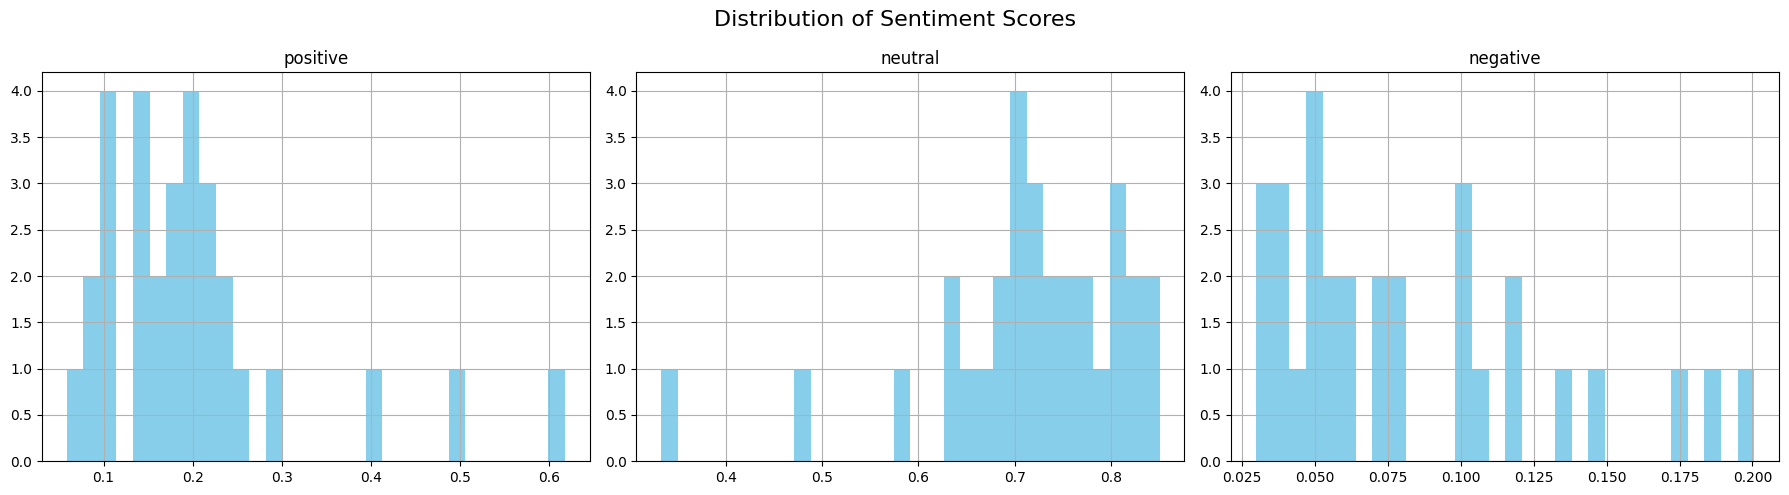

In [14]:
import matplotlib.pyplot as plt

# Histogram
merged_df[['positive', 'neutral', 'negative']].hist(bins=30, layout=(1, 3), figsize=(18, 5), color='skyblue')
plt.suptitle("Distribution of Sentiment Scores", fontsize=16)
plt.tight_layout()
plt.show()


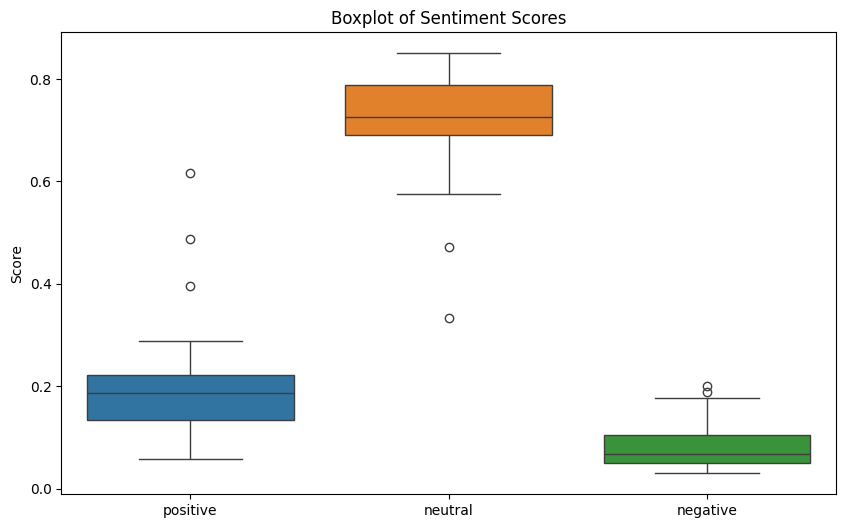

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[['positive', 'neutral', 'negative']])
plt.title("Boxplot of Sentiment Scores")
plt.ylabel("Score")
plt.show()


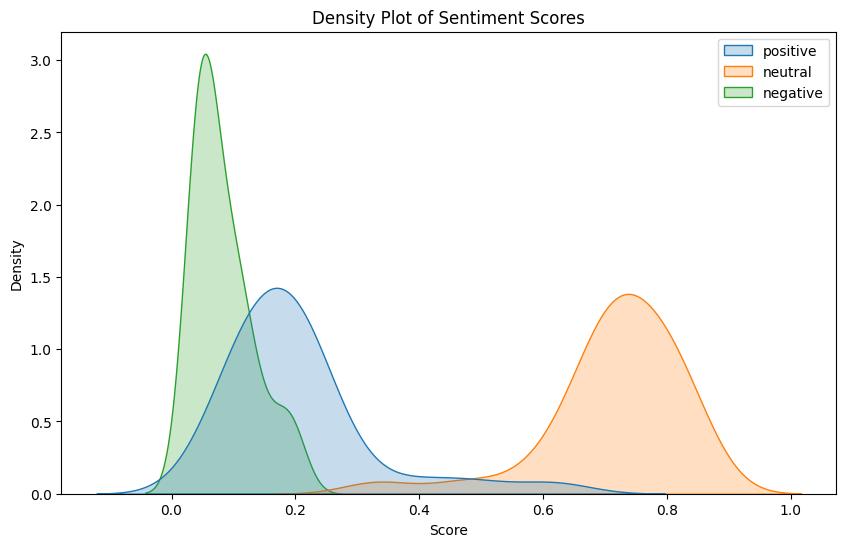

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df[['positive', 'neutral', 'negative']], fill=True)
plt.title("Density Plot of Sentiment Scores")
plt.xlabel("Score")
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller

# Ensure the dataframe is sorted
merged_df = merged_df.sort_values(by='date')

# Set date as index
ts = merged_df.set_index('date')['price']

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(ts.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ModuleNotFoundError: No module named 'statsmodels'

In [18]:
!pip install statsmodels


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [19]:
from statsmodels.tsa.stattools import adfuller


In [20]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on 'price'
result = adfuller(merged_df['price'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic: -0.7220613755526855
p-value: 0.8409520927558992
Critical Value (1%): -3.6996079738860943
Critical Value (5%): -2.9764303469999494
Critical Value (10%): -2.627601001371742


In [21]:
# First differencing
merged_df['price_diff'] = merged_df['price'].diff().dropna()

# Drop NaN created by differencing
diff_df = merged_df.dropna(subset=['price_diff'])

# Re-run ADF test on differenced data
result_diff = adfuller(diff_df['price_diff'])

print("ADF Statistic (Differenced):", result_diff[0])
print("p-value:", result_diff[1])
for key, value in result_diff[4].items():
    print(f"Critical Value ({key}): {value}")


ADF Statistic (Differenced): -4.778914022195943
p-value: 5.966884307932032e-05
Critical Value (1%): -3.6996079738860943
Critical Value (5%): -2.9764303469999494
Critical Value (10%): -2.627601001371742


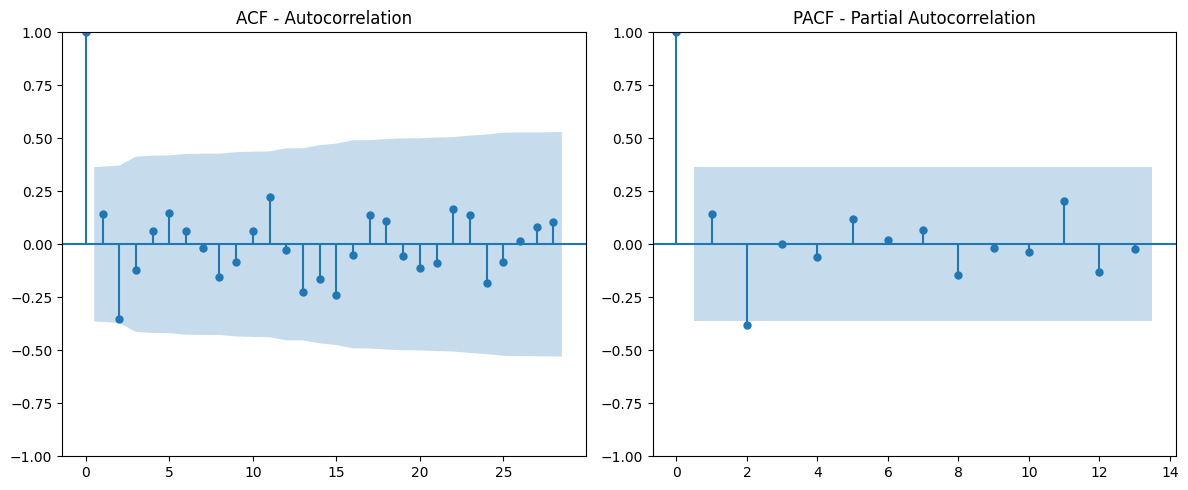

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Safe lag values
max_pacf_lags = (len(diff_df['price_diff']) // 2) - 1
max_acf_lags = min(30, len(diff_df['price_diff']) - 1)

plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(diff_df['price_diff'], lags=max_acf_lags, ax=plt.gca())
plt.title('ACF - Autocorrelation')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(diff_df['price_diff'], lags=max_pacf_lags, ax=plt.gca(), method='ywm')
plt.title('PACF - Partial Autocorrelation')

plt.tight_layout()
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on original price data with one difference (d=1)
model = ARIMA(merged_df['price'], order=(1, 1, 1))
results = model.fit()

# Print summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 307.693
Date:                Sun, 27 Jul 2025   AIC                           -609.385
Time:                        11:32:43   BIC                           -605.283
Sample:                             0   HQIC                          -608.100
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3281   6.28e-19  -5.22e+17      0.000      -0.328      -0.328
ma.L1          0.7090   5.97e-19   1.19e+18      0.000       0.709       0.709
sigma2      2.478e-11   3.62e-10      0.068      0.9

In [26]:
pip install pmdarima


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pmdarima]2/4 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade pip
!pip uninstall -y pmdarima
!pip install pmdarima --no-binary :all:


  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [92 lines of output]
      Ignoring numpy: markers 'python_version < "3.10"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.10" and platform_system != "Windows"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.10" and platform_system == "Windows"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.12"' don't match your environment
      Ignoring scipy: markers 'python_version <= "3.8" and platform_machine != "aarch64"' don't match your environment
      Ignoring scipy: markers 'python_version <= "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring scipy: markers 'python_version == "3.9"' don't match your environment
      Ignoring scipy

In [6]:
!pip install pmdarima


In [8]:
!pip uninstall -y pmdarima numpy


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2


In [9]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 57.5 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.16.0 requires numpy<2.6,>=1.25.2, but you have numpy 1.23.5 which is incompatible.


In [10]:
!pip install pmdarima


  Using cached pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (7.8 kB)
  Using cached numpy-2.3.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached pmdarima-2.0.4-cp311-cp311-macosx_11_0_arm64.whl (628 kB)
Using cached numpy-2.3.2-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pmdarima]1/2 [pmdarima]


In [12]:
!pip uninstall -y pmdarima numpy
!pip install numpy==1.23.5
!pip install --no-binary :all: pmdarima


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
  Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-macosx_11_0_arm64.whl (13.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.16.0 requires numpy<2.6,>=1.25.2, but you have numpy 1.23.5 which is incompatible.
  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [92 lines of output]
      Ignoring numpy: markers 'python_version < "3.10"' don't match your environment
      Ignoring numpy: markers 

In [15]:
import pandas as pd


In [17]:
import pandas as pd

# Load the price data
price_df = pd.read_csv('/Users/eltayebyousif/Documents/meme-coin project/meme-coin-analysis-main/data/pepe_price.csv')

# Convert timestamp to datetime and rename
price_df['timestamp'] = pd.to_datetime(price_df['timestamp'])
price_df.rename(columns={'timestamp': 'date'}, inplace=True)


In [19]:
print(price_df.columns)


Index(['date', 'price'], dtype='object')


In [24]:
from textblob import TextBlob
import pandas as pd

# Load tweet data
tweets_df = pd.read_csv("/Users/eltayebyousif/Documents/meme-coin project/pepe_tweets.csv")

# Convert date column
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Apply TextBlob sentiment analysis
def get_sentiment_scores(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    # Optional: convert polarity to crude categories
    return pd.Series({
        'positive': 1 if polarity > 0.1 else 0,
        'neutral': 1 if -0.1 <= polarity <= 0.1 else 0,
        'negative': 1 if polarity < -0.1 else 0,
        'polarity': polarity
    })

sentiment_scores = tweets_df['content'].apply(get_sentiment_scores)
tweets_df = pd.concat([tweets_df, sentiment_scores], axis=1)


In [25]:
# Group by date and compute mean sentiment
daily_sentiment = tweets_df.groupby(tweets_df['date'].dt.date)[['positive', 'neutral', 'negative', 'polarity']].mean().reset_index()

# Rename and format date column
daily_sentiment.rename(columns={'date': 'date'}, inplace=True)
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])


In [26]:
merged_df = pd.merge(price_df, daily_sentiment, on='date', how='inner')


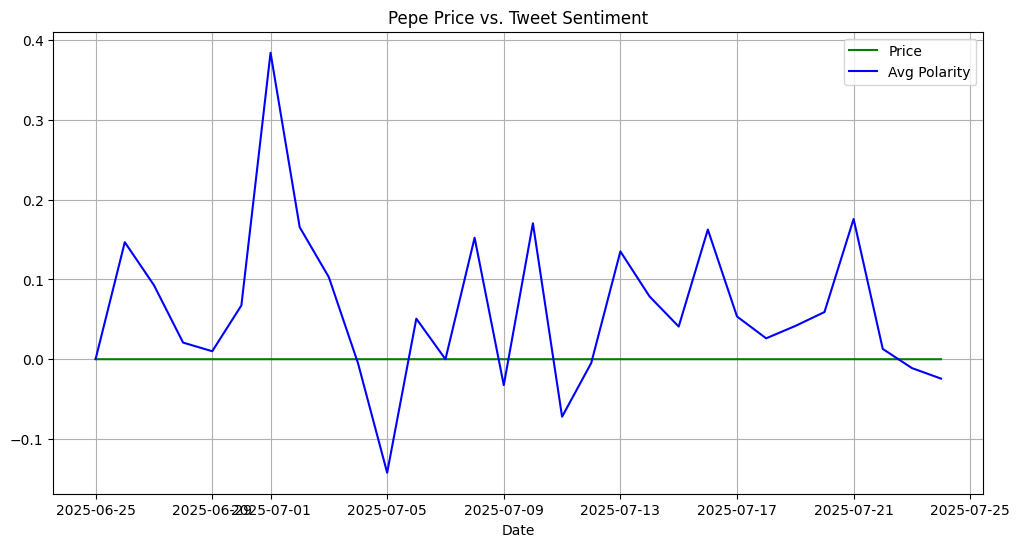

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['price'], label='Price', color='green')
plt.plot(merged_df['date'], merged_df['polarity'], label='Avg Polarity', color='blue')
plt.title('Pepe Price vs. Tweet Sentiment')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
correlations = merged_df[['price', 'positive', 'neutral', 'negative', 'polarity']].corr()
print(correlations['price'].sort_values(ascending=False))


price       1.000000
negative    0.072718
positive    0.056178
neutral    -0.081659
polarity   -0.111468
Name: price, dtype: float64


In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA with exogenous input (polarity)
model = ARIMA(merged_df['price'], order=(1,1,1), exog=merged_df[['polarity']])
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 337.303
Date:                Sun, 27 Jul 2025   AIC                           -666.606
Time:                        12:04:29   BIC                           -661.136
Sample:                             0   HQIC                          -664.893
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
polarity   -1.215e-06   9.04e-06     -0.134      0.893   -1.89e-05    1.65e-05
ar.L1         -0.3852   7.55e-12   -5.1e+10      0.000      -0.385      -0.385
ma.L1          0.7904   8.99e-12   8.79e+10      0.0

/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
# Create lagged sentiment
merged_df['polarity_lag1'] = merged_df['polarity'].shift(1)

# Drop rows where lagged polarity is NaN (first row)
model_df = merged_df.dropna(subset=['polarity_lag1'])

# Fit ARIMA with aligned data
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(model_df['price'], order=(1, 1, 1), exog=model_df[['polarity_lag1']])
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   29
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 330.857
Date:                Sun, 27 Jul 2025   AIC                           -653.714
Time:                        12:07:43   BIC                           -648.386
Sample:                             0   HQIC                          -652.085
                                 - 29                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
polarity_lag1 -7.681e-07   5.42e-06     -0.142      0.887   -1.14e-05    9.85e-06
ar.L1            -0.3542   4.54e-13   -7.8e+11      0.000      -0.354      -0.354
ma.L1             0.7358   4.41e-12   1.

/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11

In [32]:
forecast = model_fit.forecast(steps=5, exog=[[your_future_polarity_lag1]] * 5)
print(forecast)


NameError: name 'your_future_polarity_lag1' is not defined

In [33]:
# Get the last known polarity_lag1 value
last_polarity = merged_df['polarity_lag1'].dropna().iloc[-1]

# Create future exogenous variable values (repeating the last one)
future_exog = [[last_polarity]] * 5

# Forecast the next 5 prices
forecast = model_fit.forecast(steps=5, exog=future_exog)
print(forecast)


29    0.000012
30    0.000012
31    0.000012
32    0.000012
33    0.000012
Name: predicted_mean, dtype: float64


/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/eltayebyousif/.pyenv/versions/3.11.9/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


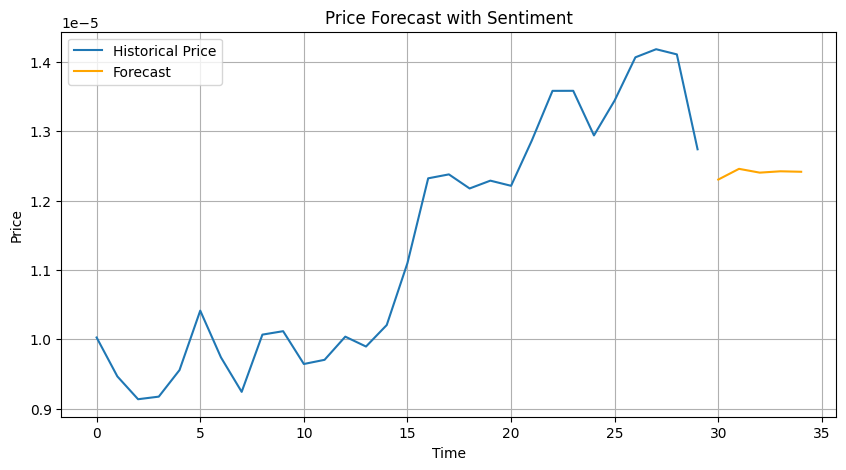

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['price'], label='Historical Price')
plt.plot(range(len(merged_df), len(merged_df) + 5), forecast, label='Forecast', color='orange')
plt.legend()
plt.title('Price Forecast with Sentiment')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [35]:
merged_df.to_csv("merged_pepe_sentiment_price.csv", index=False)
pd.DataFrame({'forecasted_price': forecast}).to_csv("forecast_pepe.csv", index=False)


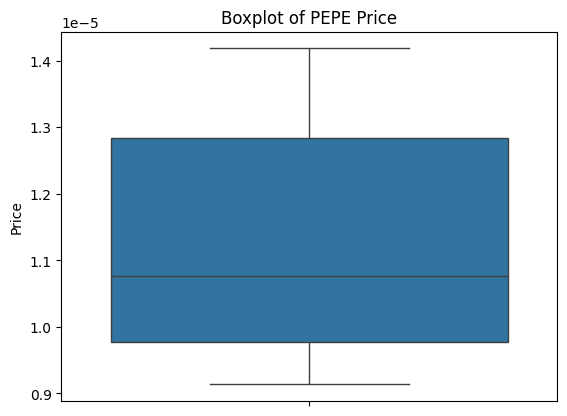

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of the price column
sns.boxplot(y=merged_df['price'])
plt.title("Boxplot of PEPE Price")
plt.ylabel("Price")
plt.show()


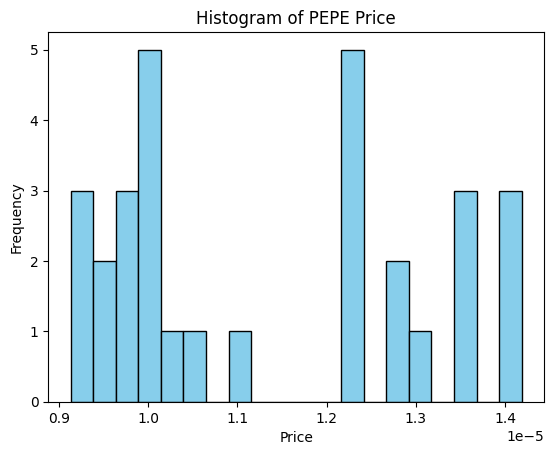

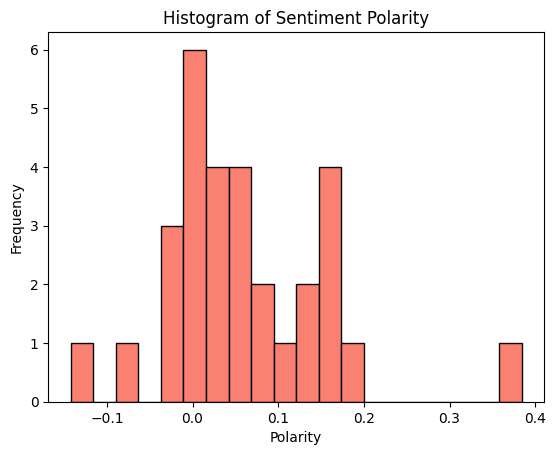

In [37]:
# Histogram of PEPE price
plt.hist(merged_df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of PEPE Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Histogram of polarity (sentiment)
plt.hist(merged_df['polarity'], bins=20, color='salmon', edgecolor='black')
plt.title("Histogram of Sentiment Polarity")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


/var/folders/m2/n6h_7vm904ldtqbqsy6lb1km0000gn/T/ipykernel_72868/971576794.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df['price'], shade=True)


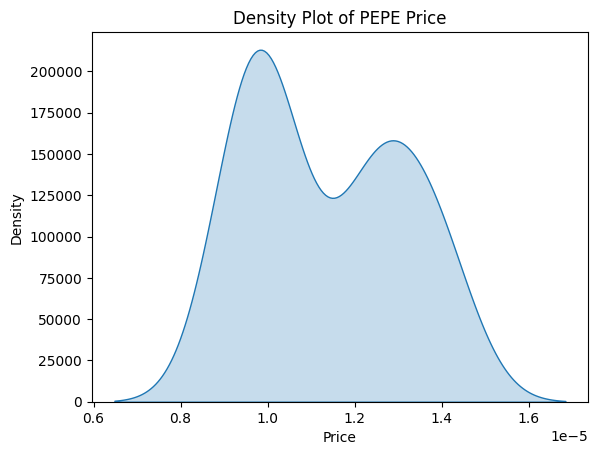

In [38]:
# KDE (Density) plot of price
sns.kdeplot(merged_df['price'], shade=True)
plt.title("Density Plot of PEPE Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()


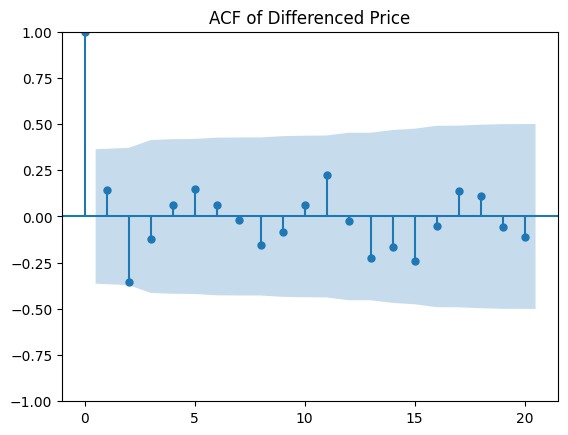

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 14.

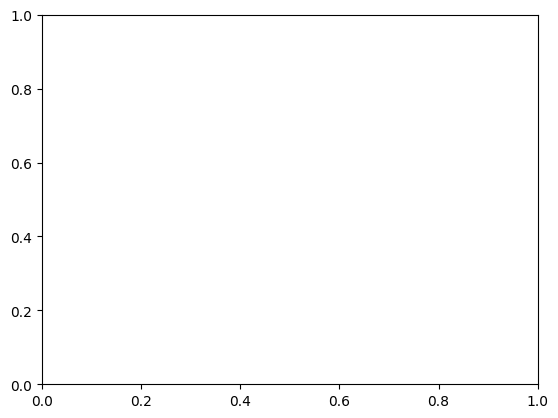

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots on differenced price series
from statsmodels.tsa.stattools import adfuller

# Difference the price to make it stationary
price_diff = merged_df['price'].diff().dropna()

plot_acf(price_diff, lags=20)
plt.title("ACF of Differenced Price")
plt.show()

plot_pacf(price_diff, lags=20)
plt.title("PACF of Differenced Price")
plt.show()


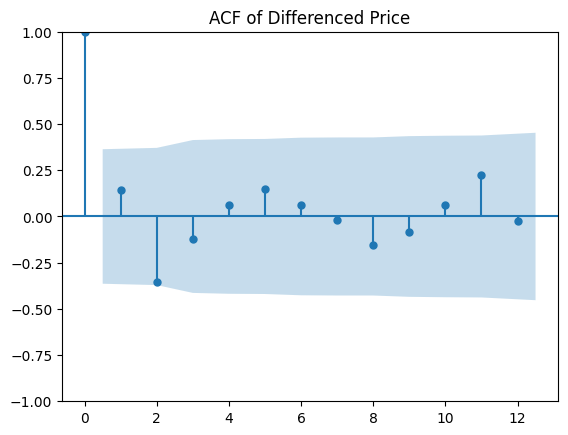

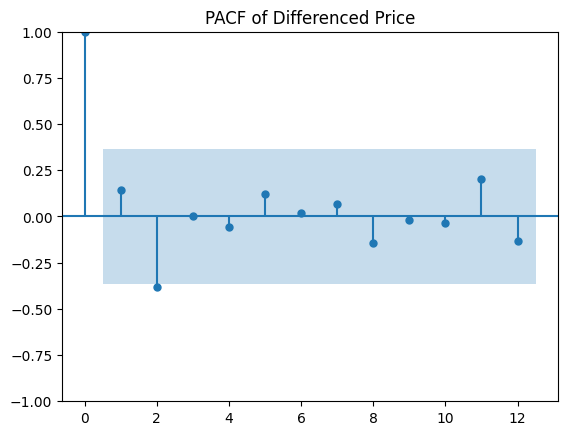

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(price_diff, lags=12)
plt.title("ACF of Differenced Price")
plt.show()

# Plot PACF
plot_pacf(price_diff, lags=12)
plt.title("PACF of Differenced Price")
plt.show()


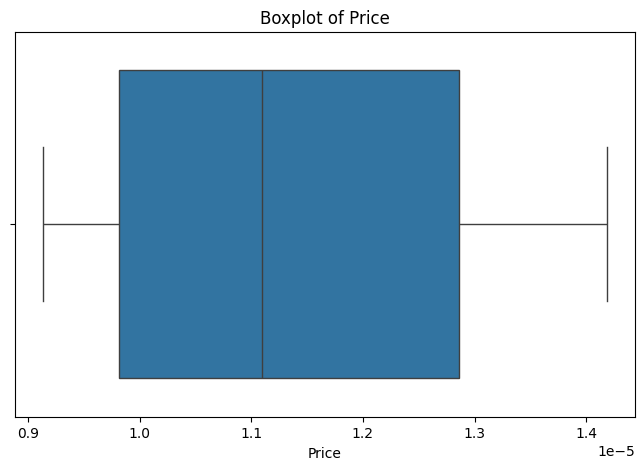

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=price_df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


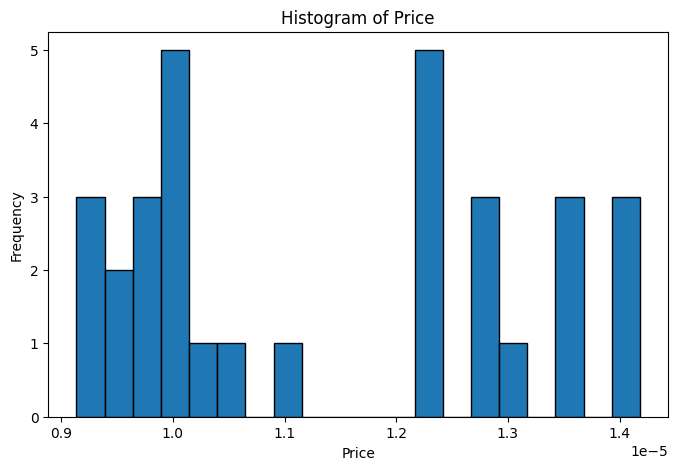

In [42]:
plt.figure(figsize=(8, 5))
plt.hist(price_df['price'], bins=20, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


/var/folders/m2/n6h_7vm904ldtqbqsy6lb1km0000gn/T/ipykernel_72868/1579138521.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price_df['price'], shade=True)


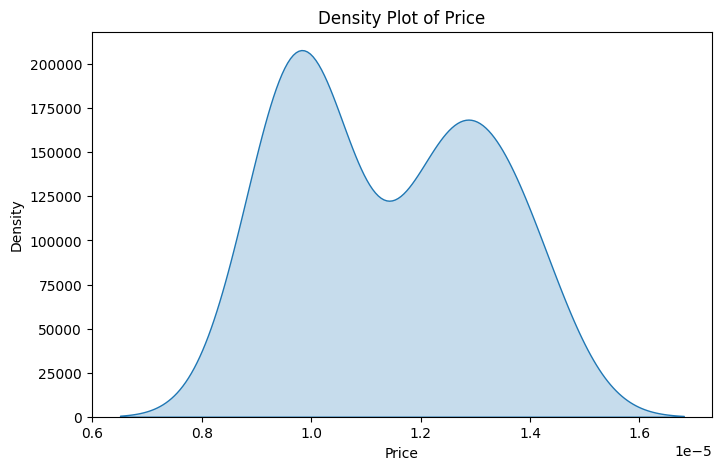

In [43]:
plt.figure(figsize=(8, 5))
sns.kdeplot(price_df['price'], shade=True)
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.show()


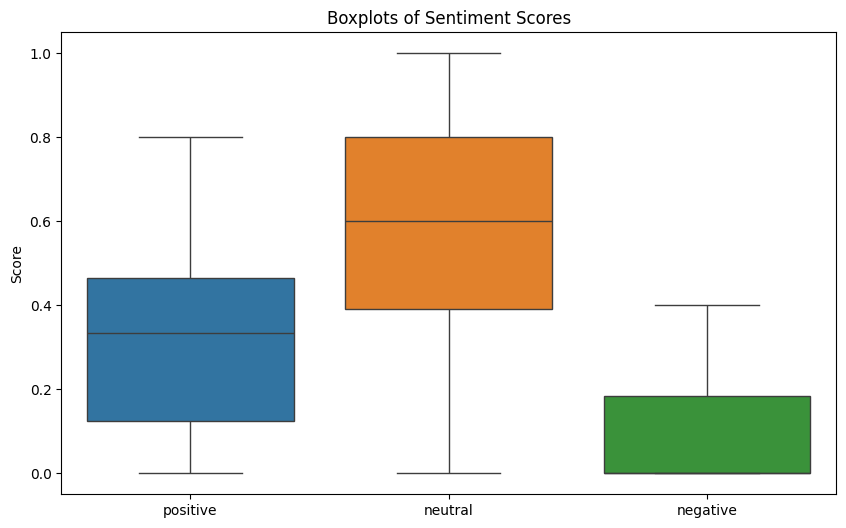

In [44]:
sentiment_cols = ['positive', 'neutral', 'negative']
plt.figure(figsize=(10, 6))
sns.boxplot(data=daily_sentiment[sentiment_cols])
plt.title("Boxplots of Sentiment Scores")
plt.ylabel("Score")
plt.show()


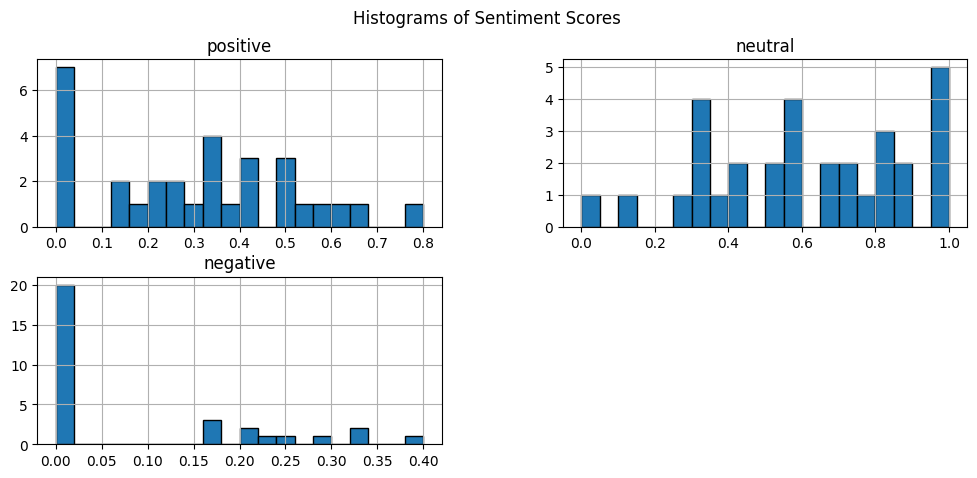

In [45]:
daily_sentiment[sentiment_cols].hist(bins=20, figsize=(12, 5), edgecolor='black')
plt.suptitle("Histograms of Sentiment Scores")
plt.show()


/var/folders/m2/n6h_7vm904ldtqbqsy6lb1km0000gn/T/ipykernel_72868/4051294.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(daily_sentiment[col], label=col, shade=True)
/var/folders/m2/n6h_7vm904ldtqbqsy6lb1km0000gn/T/ipykernel_72868/4051294.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(daily_sentiment[col], label=col, shade=True)
/var/folders/m2/n6h_7vm904ldtqbqsy6lb1km0000gn/T/ipykernel_72868/4051294.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(daily_sentiment[col], label=col, shade=True)


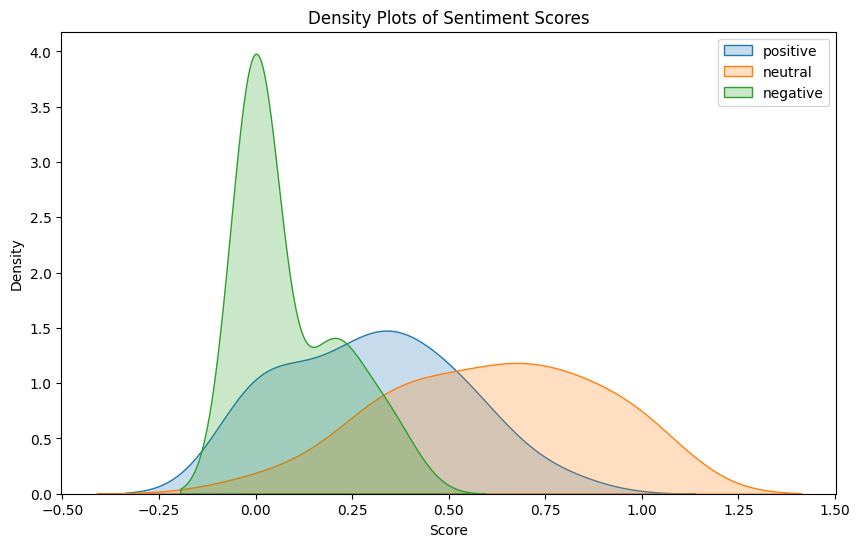

In [46]:
plt.figure(figsize=(10, 6))
for col in sentiment_cols:
    sns.kdeplot(daily_sentiment[col], label=col, shade=True)

plt.title("Density Plots of Sentiment Scores")
plt.xlabel("Score")
plt.legend()
plt.show()
